## Set plot interactive
Allow for interactive plots powered by matplotlib. Execution before running MyOpticsLab ***does*** matter.  

In [1]:
%matplotlib notebook

## Initialise Spectrometers and basic functions#

By running this cell, functions and classes predefined in the python scripts in the *lib* folder are loaded and a scan for connected *Ocean Optics* **spectrometers** is conducted. Once a connection to one or more spectrometers is established, you will be provided with the respective information and control buttons will be invoked for the adjustment of crucial measurement parameters. 

*Warning:*  During this process, access to spectrometers is granted exclusively to (the kernel of) this notebook. *(Should you wish to access the spectrometers from another notebook, first shut down this notebook or restart its kernel.)* 

In [2]:
%run modules/MyOpticsLab.py


 Hello nils! Welcome to LabOptica :)

 The following Ocean Optics devices have been recognized:
[<SeaBreezeDevice QE65000:QEB0653>]

 Connected to QE65000


interactive(children=(RadioButtons(description='devices', options=('QE65000',), value='QE65000'), Checkbox(value=False, description='light'), Output()), _dom_classes=('widget-interact',))

## Live Data ViewPort

The next cell invokes a *live data feed* for each of the recognised spectrometers. Now, based on the visual feedback, we can alter some of the **measurement parameters** for the selected spectrometer sing the control buttons above and observe the effects on the corresponding intensity signal.

*Notes*: 
- **Integration time (IT)**: Note that while increasing integration time you will reach a point at which the signal starts to flatten at the upper border. This is not due to the graphics window, but to the saturation of the photodetectors in the spectrometer. This situation has to be avoided, as the signal becomes invariant to other factors. 

Box(children=(Button(description='QE65000', icon='pause', style=ButtonStyle(), tooltip='Pause/Resume'),))

<IPython.core.display.Javascript object>


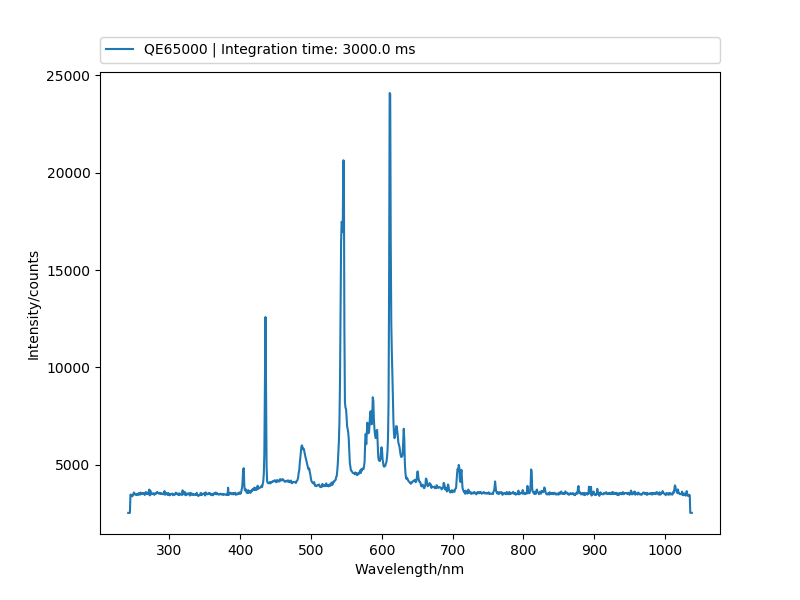

In [3]:
MyLab.show_DataFeed()

In [ ]:
ViewPort

## Spectrometer access 
Instances of connected (and recognised) Ocean Optics spectrometers are stored in the dictionary `OO`. So, spectrometers can be accessed as shown below, replacing `DeviceName` with one of the spectrometer names provided during their initialisation:

assigns access and all the functions proper to the spectrometer with name `DeviceName` to a variable with the same name, such that associated functions, e. g. `get_spectrum()`, can be called either by 

# Define data-storage #
### ***Open/create database file ***###
Initialise database. *** write_to *** defines the location on disk where datasets are stored (in order to save to an existing folder, e.g. "Folder", contained in "Measurement", enter `'Folder/filename'`)

In [6]:
import tables

# set database name:
write_to = input('Enter the name and location of your database: ')
title_user  = input('Add a descriptive title (optional): ')

# create File object and assign to variable db
db = tables.open_file(write_to+".h5", mode="a", title=title_user)

Enter the name and location of your database: asd
Add a descriptive title (optional): 


### ***Define datasets***###
Decide whether you want to add a group to the database root (recommended) and if yes, add it:

In [5]:
experiment_name = input('Name this experiment: ')
description_user  = input('Add a description (optional): ')

experiment = db.create_group(db.root, experiment_name, description_user)

Name this experiment: blue_dye
Add a description (optional): 


*We may want to add a first entry containing the wavelength binning provided by the spectrometer to the dataset*:

In [9]:
wl = db.create_array(experiment, 'wl', spectrometer.WL)

### ***Flush data***###

In [11]:
db.flush()

### *Close database object* ##

In [7]:
db.close()

## Data acquisition ##
### *** Define a measurement sequence ***

In [7]:
# Define spectrometer access
spectrometer = OO['QE65000']

def sequence(spectrometer):
    
    # Define number of spectra averaged through "avg_spec"
    N=2
    
    spectrometer.stream.interrupt()
    # ======================================================
    # Perform dark corrected data retrieval from spectrometer (returns dictionary!)
    # ======================================================
    input('light OFF')

    Idark = spectrometer.avg_spec(N)

    input('light ON')

    I = spectrometer.avg_spec(N)

    I['mean_spec'] = I['mean_spec'] - Idark['mean_spec']
    # ======================================================
    spectrometer.light_off()
        
    return I
    # Note: remember that I is a dictionary!    

### ***Execute sequence***###

In [ ]:
measurement = sequence(spectrometer)

### ***Save readout***###
First *label and add* the **array of mean intensities** obtained by the sequence to the experiment group in the database defined previously:

In [9]:
db = tables.open_file(write_to+".h5", mode="a", title=title_user)

readout_label = input('Label of readout: ')
readout_description = input('Description? ')

readout = db.create_array(experiment, readout_label, measurement['mean_spec'])

Label of readout: c12
Description? 20 mg/mL food colorant E-131


Now add the other attributes contained in the dictionary returned by `measurement`:

In [10]:
readout.attrs['IT'] = measurement['IT']
readout.attrs['N'] = measurement['N']

### ***Flush data and close access***###

In [3]:
db.flush()
db.close()

ClosedFileError: the file object is closed